In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from UliEngineering.EngineerIO import format_value
from si_prefix import si_format
import plecs_helper as helper
%matplotlib
%matplotlib inline

# Imports and setup
from pint import UnitRegistry
import math
import numpy

# pandas display using scientific notation
# pd.set_option('display.float_format', lambda x: f'{x:.3e}')

# use pint
units = UnitRegistry()
units.default_format = "~P.2f"

Using matplotlib backend: TkAgg


### Define measured constants and nominal values

In [27]:
Cout = 100 * units.microfarad
Fs = 50 * units.kilohertz
Ts = 1 / Fs
Ibat = 20 * units.amp
Vg_nominal = 30 * units.volt
Vbat_nominal = 12 * units.volt
Rbat = 0.1 * units.ohm
Vout_nominal = Vbat_nominal + Ibat * Rbat
D_nominal = Vout_nominal / Vg_nominal
Lcrit = (Vg_nominal - Vout_nominal) * D_nominal * Ts / (2 * Ibat)
# L = Lcrit
L = Vout_nominal / (2 * Ibat) * (1 - D_nominal) * Ts

print(f"D = {np.round(D_nominal, 2)}")
print(f"L = {L.to_compact(units.henry)}")
print(f"Vout = {Vout_nominal.to_compact(units.volt)}")

D = 0.47
L = 3.73 µH
Vout = 14.00 V


### Finding the compensator values
Using code copied from Lab 11

In [28]:
def to_db(gain):
    return np.log10(gain) * 20

def to_decibels(gain):
    return to_db(gain)

def from_db(db):
    return 10 ** (db / 20)

class Compensator:
    def __init__(self, Rf1_unitless):
        self.Rf1 = Rf1_unitless * units.ohm
        self.find_values()

    def __repr__(self) -> str:
        return f"K: {self.K},\t Gc0: {self.Gc0.to_compact()},\t Rf1: {self.Rf1.to_compact(units.ohm)},\t Rc1: {self.Rc1.to_compact(units.ohm)},\t Cc1: {self.Cc1.to_compact(units.farad)},  \t Cc2: {self.Cc2.to_compact(units.farad)}"

    def find_values(self):

        self.wc = 50 * units.kilohertz * units.revolutions / 8

        self.angle_boost = 30 * units.degree
        self.K = np.tan((self.angle_boost / 2 + 45 * units.degree))
        self.Kp = 1 / from_db(13) # from_db(32)
        self.wz = self.wc / self.K
        self.wp = self.wc * self.K
        self.Gc0 = self.Kp * self.wc * np.sqrt((1 + self.K ** (-2)) / (1 + self.K ** 2))
        self.Cc1 = 1 / (self.Gc0 * self.Rf1)
        self.Rc1 = 1 / (self.wz * self.Cc1)
        self.Cc2 = 1 / (self.wp * self.Rc1)

for R in [2, 2.2, 2.7, 3.3, 3.9, 4.3, 4.7, 5.1, 5.6, 6.2, 6.8, 7.5, 8.2, 10]: # values to try in kiloohms
    R_to_highlight = 5.6
    if R == R_to_highlight:
        print() # highlight the chosen value
    compensator = Compensator(R * 1e3)
    print(compensator)
    if R == R_to_highlight:
        print()

K: 1.73,	 Gc0: 807.83 Hz·turn,	 Rf1: 2.00 kΩ,	 Rc1: 447.74 Ω,	 Cc1: 98.51 nF,  	 Cc2: 32.84 nF
K: 1.73,	 Gc0: 807.83 Hz·turn,	 Rf1: 2.20 kΩ,	 Rc1: 492.52 Ω,	 Cc1: 89.55 nF,  	 Cc2: 29.85 nF
K: 1.73,	 Gc0: 807.83 Hz·turn,	 Rf1: 2.70 kΩ,	 Rc1: 604.45 Ω,	 Cc1: 72.97 nF,  	 Cc2: 24.32 nF
K: 1.73,	 Gc0: 807.83 Hz·turn,	 Rf1: 3.30 kΩ,	 Rc1: 738.78 Ω,	 Cc1: 59.70 nF,  	 Cc2: 19.90 nF
K: 1.73,	 Gc0: 807.83 Hz·turn,	 Rf1: 3.90 kΩ,	 Rc1: 873.10 Ω,	 Cc1: 50.52 nF,  	 Cc2: 16.84 nF
K: 1.73,	 Gc0: 807.83 Hz·turn,	 Rf1: 4.30 kΩ,	 Rc1: 962.65 Ω,	 Cc1: 45.82 nF,  	 Cc2: 15.27 nF
K: 1.73,	 Gc0: 807.83 Hz·turn,	 Rf1: 4.70 kΩ,	 Rc1: 1.05 kΩ,	 Cc1: 41.92 nF,  	 Cc2: 13.97 nF
K: 1.73,	 Gc0: 807.83 Hz·turn,	 Rf1: 5.10 kΩ,	 Rc1: 1.14 kΩ,	 Cc1: 38.63 nF,  	 Cc2: 12.88 nF

K: 1.73,	 Gc0: 807.83 Hz·turn,	 Rf1: 5.60 kΩ,	 Rc1: 1.25 kΩ,	 Cc1: 35.18 nF,  	 Cc2: 11.73 nF

K: 1.73,	 Gc0: 807.83 Hz·turn,	 Rf1: 6.20 kΩ,	 Rc1: 1.39 kΩ,	 Cc1: 31.78 nF,  	 Cc2: 10.59 nF
K: 1.73,	 Gc0: 807.83 Hz·turn,	 Rf1: 6.80 kΩ,	 Rc1: 

### Gc

expected_wc = 6250.0
Lead element center voltage (ω_c): 6.25 kHz


C:\Users\ieykamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\ieykamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\ieykamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


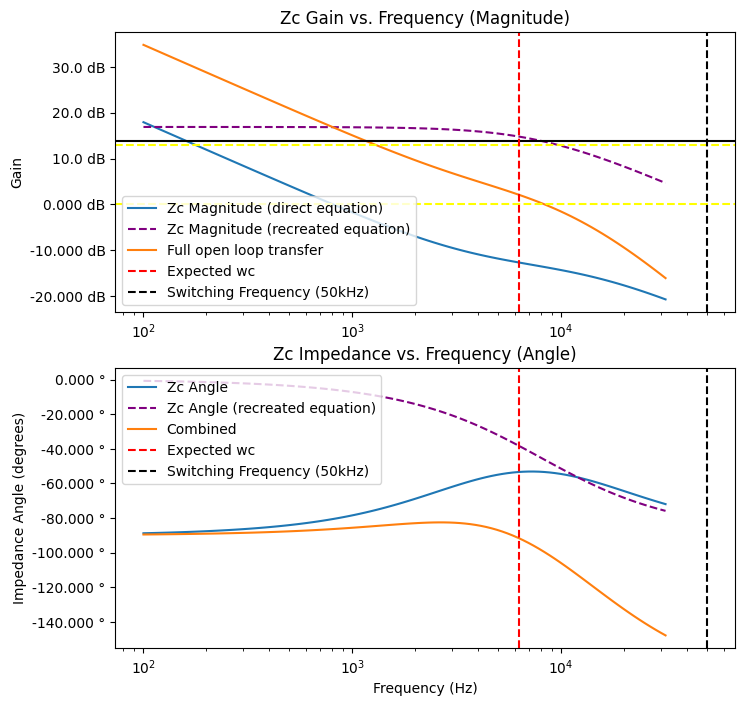

In [29]:
# chosen values
compensator = Compensator(5.6 * 1e3)
R2 = compensator.Rf1.to(units.ohm).magnitude
R3 = 0
R5 = compensator.Rc1.to(units.ohm).magnitude
C1 = compensator.Cc1.to(units.farad).magnitude
C2 = compensator.Cc2.to(units.farad).magnitude

# R2 = 4.3e3 # * units.kiloohm
# R3 = 1.5e3 # * units.kiloohm
# Vtarget = 2.5 * (R2 + R3) / R3 # * units.volt
# print(f"The expected output voltage given the voltage divider resistors is: {si_format(Vtarget, precision = 2)}V")

# C1 = 47e-9 # * units.nanofarad
# C2 = 10e-9 # * units.nanofarad
# R5 = 510 # * units.ohm

# w = np.logspace(1, 7, 100) # * units.hertz
w = np.logspace(2, 4.5, 100) # * units.hertz
def get_Zc(my_w):
    # my_Zc = 1 / (1 / (R5 + 1 / (1j * my_w * C1)) + 1 / (1 / (1j * my_w * C2))) / 4.3e3 # kOhm
    my_Zc = 1 / (1 / (R5 + 1 / (2 * np.pi * 1j * my_w * C1)) + 1 / (1 / (2 * np.pi * 1j * my_w * C2))) / 4.3e3 # kOhm
    return my_Zc
Zc = get_Zc(w) # direct equation
# Zc2 = (2 * np.pi * 1j * w / (40e3) + 1) / ((2 * np.pi * 1j * w / (1.9e7)) * (2 * np.pi * 1j * w / (250e3) + 1)) / 4.3e3 # kOhm # recreated equation
Rload = 0.1 # * units.ohm
Cload = 200e-6 # * units.farad
Zc2 = Rload / (1 + (2 * np.pi * 1j * w) * Rload * Cload) * 70 # 500

expected_wc = 1 / (R5 * np.sqrt(C1 * C2)) / 2 / np.pi # to get it into Hz
print(f"expected_wc = {expected_wc}")
print(f"Lead element center voltage (ω_c): {si_format(expected_wc, precision = 2)}Hz")

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (8, 8))
helper.axes_labels("", "Hz", "Gain", "dB", title = "Zc Gain vs. Frequency (Magnitude)", ax = ax1)
ax1.semilogx(w, to_decibels(Zc), linestyle = "solid", label = "Zc Magnitude (direct equation)")
ax1.semilogx(w, to_decibels(Zc2), linestyle = "dashed", color = "purple", label = "Zc Magnitude (recreated equation)")
ax1.semilogx(w, to_decibels(Zc * Zc2), linestyle = "solid", label = "Full open loop transfer")
ax1.axhline(y = to_decibels(Zc2[0]) - 3, linestyle = "solid", color = "black")
ax1.axhline(y = 13, linestyle = "dashed", color = "yellow")
ax1.axhline(y = 0, linestyle = "dashed", color = "yellow")
ax1.axvline(x = expected_wc, linestyle = "dashed", color = "red", label = "Expected wc")
ax1.axvline(x = 50e3, linestyle = "dashed", color = "black", label = "Switching Frequency (50kHz)")
ax1.legend(loc = "lower left")

helper.axes_labels("Frequency (Hz)", "Hz", "Impedance Angle (degrees)", "°", title = "Zc Impedance vs. Frequency (Angle)", ax = ax2)
ax2.semilogx(w, np.angle(Zc, deg = True), linestyle = "solid", label = "Zc Angle")
ax2.semilogx(w, np.angle(Zc2, deg = True), linestyle = "dashed", color = "purple", label = "Zc Angle (recreated equation)")
ax2.semilogx(w, np.angle(Zc * Zc2, deg = True), linestyle = "solid", label = "Combined")
ax2.axvline(x = expected_wc, linestyle = "dashed", color = "red", label = "Expected wc")
ax2.axvline(x = 50e3, linestyle = "dashed", color = "black", label = "Switching Frequency (50kHz)")
ax2.legend(loc = "upper left")
# ax2.set_ylim(-100, -80)

### Boooo

In [30]:
a = 1 * units.meter
b = 2 * units.centimeter

print(a.magnitude)
print(b.magnitude)

print(b.magnitude > a.magnitude)

1
2
True
